In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [113]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from bs4 import BeautifulSoup

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kariu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Airline Reviews

In [3]:
# url = "https://www.airlinequality.com/airline-reviews/british-airways"
url = "https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->
<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->
<!--[if gt IE 8]><!-->
<html lang="en-GB">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <title>
   British Airways Customer Reviews - SKYTRAX
  </title>
  <!-- Google Chrome Frame for IE -->
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <!-- mobile meta -->
  <meta content="True" name="HandheldFriendly"/>
  <meta content="320" name="MobileOptimized"/>
  <meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport">
   <!-- icons & favicons -->
   <link href="https://www.airlinequality.com/wp-content/themes/airlinequality2014new/library/images/apple-

In [5]:
# Find the container for all reviews
reviews_container = soup.find('article', class_='comp comp_reviews-airline querylist position-content')

In [6]:
soup.title

<title>British Airways Customer Reviews - SKYTRAX</title>

In [7]:
soup.article

<article class="comp comp_reviews-airline querylist position-content">
<div class="pagination-controls">
<div class="pagination-filter">
<form method="get">
<span class="pagination-label">Filter Reviews by : </span>
<input name="pagesize" type="hidden" value="100">
<select class="page-filter-selector" data-onchange-submit="" name="filterby">
<option selected="" value="">Latest reviews</option>
<option value="cabin:first">First Class</option>
<option value="cabin:business">Business Class</option>
<option value="cabin:p_economy">Premium Economy</option>
<option value="cabin:economy">Economy Class</option>
</select>
</input></form>
</div>
<div class="pagination-size">
<form method="get">
<span class="pagination-label">Show</span>
<input name="sortby" type="hidden" value="post_date:Desc">
<ul class="page-size-selector">
<li>
<input data-onchange-submit="" id="10" name="pagesize" type="radio" value="10">
<label for="10">10</label>
</input></li>
<li>
<input data-onchange-submit="" id="20" na

In [8]:
reviews_titles = soup.article.find_all('h2')
verification = soup.article.find_all('em')

In [9]:
reviews_titles

[<h2 class="text_header">"Very Poor Business class product"</h2>,
 <h2 class="text_header">“if GF - take your own food”</h2>,
 <h2 class="text_header">"owed me a refund for taxes due"</h2>,
 <h2 class="text_header">“pathetic business class product”</h2>,
 <h2 class="text_header">“Staff look tired and overworked”</h2>,
 <h2 class="text_header">“I couldn’t fault them”</h2>,
 <h2 class="text_header">“incompetence in customer service”</h2>,
 <h2 class="text_header">“The most ridiculous thing I've heard”</h2>,
 <h2 class="text_header">"one of the most disgusting onboard meals"</h2>,
 <h2 class="text_header">“Does BA pay experts to design these breakfasts”</h2>,
 <h2 class="text_header">"business class seats were abysmal"</h2>,
 <h2 class="text_header">"Worst service/airline ever"</h2>,
 <h2 class="text_header">“Much better experience this time around”</h2>,
 <h2 class="text_header">“our compensation rights"</h2>,
 <h2 class="text_header">"A380's are showing their age"</h2>,
 <h2 class="text

In [10]:
reviews_titles = [h2.text.strip() for h2 in reviews_titles]
verification_texts = [em.text.strip() for em in verification]

# Create a DataFrame from the extracted text
reviews = pd.DataFrame({"Reviews": reviews_titles, 
                       "Verification": verification_texts})

print(reviews)

                                     Reviews   Verification
0         "Very Poor Business class product"  Trip Verified
1               “if GF - take your own food”   Not Verified
2           "owed me a refund for taxes due"   Not Verified
3          “pathetic business class product”  Trip Verified
4          “Staff look tired and overworked”   Not Verified
..                                       ...            ...
95         "still waiting for reimbursement"   Not Verified
96                "unprofessional, uncaring"  Trip Verified
97  "Nice flight, good crew, very good seat"  Trip Verified
98              "Such a horrible experience"  Trip Verified
99                         "Never again, BA"  Trip Verified

[100 rows x 2 columns]


In [11]:
reviews.to_csv("british_airways_reviews_latest.csv", index=False)

### First Class

In [12]:
url_first_class = "https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby=cabin%3Afirst"
response_first_class = requests.get(url_first_class)
soup_first_class = BeautifulSoup(response_first_class.text, 'html.parser')

In [13]:
reviews_titles_first_class = soup_first_class.article.find_all('h2')
verification_first_class = soup_first_class.article.find_all('em')

In [14]:
reviews_titles_first_class = [h2.text.strip() for h2 in reviews_titles_first_class]
verification_texts_first_class = [em.text.strip() for em in verification_first_class]

# Create a DataFrame from the extracted text
# reviews_first_class = pd.DataFrame({"Reviews": reviews_titles_first_class, 
#                        "Verification": verification_texts_first_class})
reviews_first_class = pd.DataFrame({"Reviews": reviews_titles_first_class})
verification_first_class = pd.DataFrame({"Verification": verification_texts_first_class})

print(reviews_first_class)

                                   Reviews
0                   "cabin crew excellent"
1               "Excellent service levels"
2                      "Very disappointed"
3                    "We are done with BA"
4                      "Excellent service"
..                                     ...
95      "not worth paying for First Class"
96        "First Class is average at best"
97    "doesn't cut the mustard any longer"
98         "BA has declined significantly"
99  "First Class is a total wate of money"

[100 rows x 1 columns]


In [15]:
reviews_first_class.shape

(100, 1)

In [16]:
verification_first_class.shape

(56, 1)

In [17]:
reviews_first_class.to_csv("british_airways_reviews_first_class.csv", index=False)
verification_first_class.to_csv("british_airways_verification_first_class.csv", index=False)

### Business Class

In [18]:
url_business_class = "https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby=cabin%3Abusiness"
response_business_class = requests.get(url_business_class)
soup_business_class = BeautifulSoup(response_business_class.text, 'html.parser')

reviews_titles_business_class = soup_business_class.article.find_all('h2')
verification_business_class = soup_business_class.article.find_all('em')

reviews_titles_business_class = [h2.text.strip() for h2 in reviews_titles_business_class]
verification_texts_business_class = [em.text.strip() for em in verification_business_class]

# Create a DataFrame from the extracted text
reviews_business_class = pd.DataFrame({"Reviews": reviews_titles_business_class, 
                       "Verification": verification_texts_business_class})
# reviews_business_class = pd.DataFrame({"Reviews": reviews_titles_business_class})
# verification_business_class = pd.DataFrame({"Verification": verification_texts_business_class})

print(reviews_business_class)

                                       Reviews   Verification
0           "Very Poor Business class product"  Trip Verified
1                 “if GF - take your own food”   Not Verified
2            “pathetic business class product”  Trip Verified
3                      “I couldn’t fault them”  Trip Verified
4   "one of the most disgusting onboard meals"  Trip Verified
..                                         ...            ...
95              "has returned to full service"  Trip Verified
96                "this flight was quite good"  Trip Verified
97                "A very positive experience"  Trip Verified
98     "Baggage took 3/4 hour to be delivered"  Trip Verified
99             "recommend BA's new Club Class"  Trip Verified

[100 rows x 2 columns]


In [19]:
reviews_business_class.to_csv("british_airways_reviews_business_class.csv", index=False)

### Premium Economy

In [20]:
url_premium_economy_class = "https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby=cabin%3Ap_economy"
response_premium_economy_class = requests.get(url_premium_economy_class)
soup_premium_economy_class = BeautifulSoup(response_premium_economy_class.text, 'html.parser')

reviews_titles_premium_economy_class = soup_premium_economy_class.article.find_all('h2')
verification_premium_economy_class = soup_premium_economy_class.article.find_all('em')

reviews_titles_premium_economy_class = [h2.text.strip() for h2 in reviews_titles_premium_economy_class]
verification_texts_premium_economy_class = [em.text.strip() for em in verification_premium_economy_class]

# Create a DataFrame from the extracted text
reviews_premium_economy_class = pd.DataFrame({"Reviews": reviews_titles_premium_economy_class, 
                       "Verification": verification_texts_premium_economy_class})
# reviews_business_class = pd.DataFrame({"Reviews": reviews_titles_business_class})
# verification_business_class = pd.DataFrame({"Verification": verification_texts_business_class})

print(reviews_premium_economy_class)

                                         Reviews   Verification
0              “Staff look tired and overworked”   Not Verified
1         “The most ridiculous thing I've heard”   Not Verified
2                  "sufficient leg and arm room"  Trip Verified
3   "not a single feedback from British Airways"   Not Verified
4   "Lies and misleading unprofessional service"  Trip Verified
..                                           ...            ...
95                       "overall job well done"   Not Verified
96                   "no foil covering the food"  Trip Verified
97                "improved on board experience"  Trip Verified
98                   "a good experience with BA"  Trip Verified
99                     "an enjoyable experience"  Trip Verified

[100 rows x 2 columns]


In [21]:
reviews_premium_economy_class.to_csv("british_airways_reviews_premium_economy_class.csv", index=False)
# verification_premium_economy_class.to_csv("british_airways_verification_premium_economy_class.csv", index=False)

### Economy

In [22]:
url_economy_class = "https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby=cabin%3Aeconomy"
response_economy_class = requests.get(url_economy_class)
soup_economy_class = BeautifulSoup(response_economy_class.text, 'html.parser')

reviews_titles_economy_class = soup_economy_class.article.find_all('h2')
verification_economy_class = soup_economy_class.article.find_all('em')

reviews_titles_economy_class = [h2.text.strip() for h2 in reviews_titles_economy_class]
verification_texts_economy_class = [em.text.strip() for em in verification_economy_class]

# Create a DataFrame from the extracted text
# reviews_economy_class = pd.DataFrame({"Reviews": reviews_titles_economy_class, 
#                        "Verification": verification_texts_economy_class})
reviews_economy_class = pd.DataFrame({"Reviews": reviews_titles_economy_class})
verification_economy_class = pd.DataFrame({"Verification": verification_texts_economy_class})

print(reviews_economy_class)

                                         Reviews
0               "owed me a refund for taxes due"
1             “incompetence in customer service”
2                   "Worst service/airline ever"
3                 "A380's are showing their age"
4                        "Service was fantastic"
..                                           ...
95             "customer service was horrendous"
96  "All flights without exception were delayed"
97                 "luggage was still in London"
98  "worst experience in all my years of travel"
99                        "The worst experience"

[100 rows x 1 columns]


In [23]:
reviews_economy_class.shape

(100, 1)

In [24]:
verification_economy_class.shape

(100, 1)

In [25]:
reviews_economy_class.to_csv("british_airways_reviews_economy_class.csv", index=False)
verification_economy_class.to_csv("british_airways_verification_economy_class.csv", index=False)

### Data Pre-Processing

#### Null Values

In [26]:
reviews.isna().sum()

Reviews         0
Verification    0
dtype: int64

In [27]:
reviews_first_class.isna().sum()

Reviews    0
dtype: int64

In [28]:
verification_first_class.isna().sum()

Verification    0
dtype: int64

In [29]:
reviews_business_class.isna().sum()

Reviews         0
Verification    0
dtype: int64

In [30]:
reviews_premium_economy_class.isna().sum()

Reviews         0
Verification    0
dtype: int64

In [31]:
reviews_economy_class.isna().sum()

Reviews    0
dtype: int64

In [32]:
verification_economy_class.isna().sum()

Verification    0
dtype: int64

### Exploratory Data Analysis

#### Latest Reviews

In [33]:
verification_counts = reviews['Verification'].value_counts()
verification_counts

Verification
Trip Verified    74
Not Verified     26
Name: count, dtype: int64

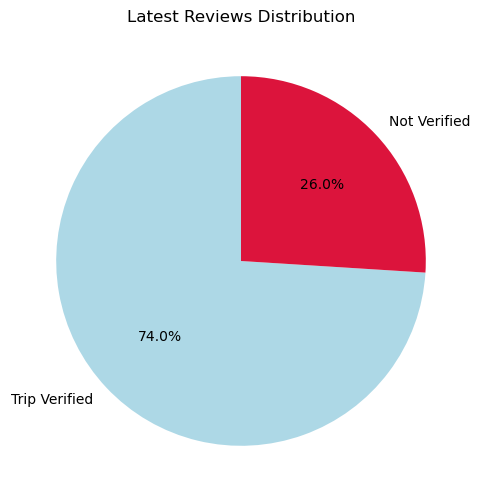

In [34]:
plt.figure(figsize=(6, 6))
plt.pie(verification_counts, 
        labels=verification_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightblue', 'crimson'])
plt.title('Latest Reviews Distribution')
plt.show()

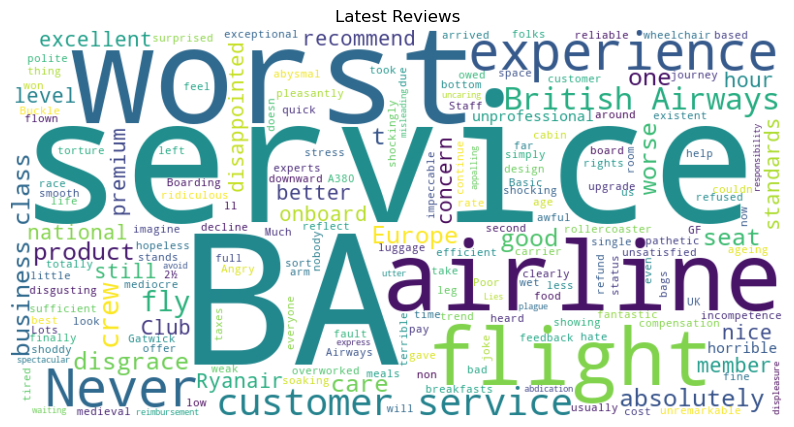

In [35]:
all_reviews = '\n'.join(reviews['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Latest Reviews')
plt.show()

#### First Class

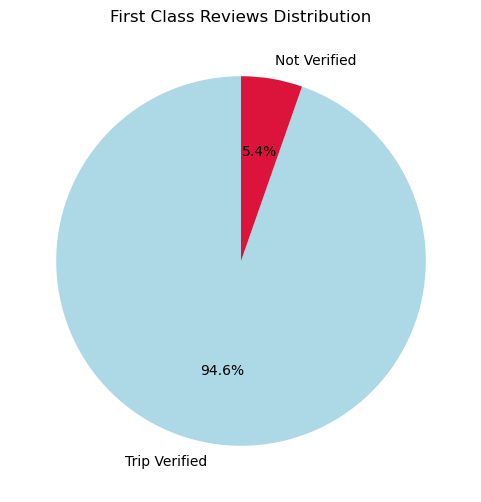

In [36]:
verification_first_class_counts = verification_first_class['Verification'].value_counts()
verification_first_class_counts

plt.figure(figsize=(6, 6))
plt.pie(verification_first_class_counts, 
        labels=verification_first_class_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightblue', 'crimson'])
plt.title('First Class Reviews Distribution')
plt.show()

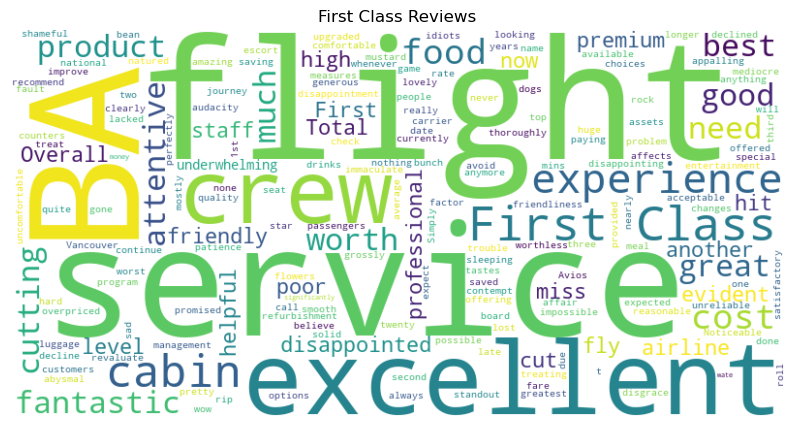

In [37]:
first_class_reviews = '\n'.join(reviews_first_class['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(first_class_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('First Class Reviews')
plt.show()

#### Business Class

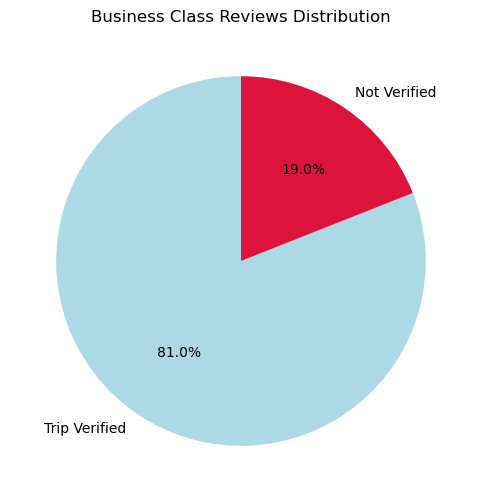

In [38]:
reviews_business_class_counts = reviews_business_class['Verification'].value_counts()
reviews_business_class_counts

plt.figure(figsize=(6, 6))
plt.pie(reviews_business_class_counts, 
        labels=reviews_business_class_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightblue', 'crimson'])
plt.title('Business Class Reviews Distribution')
plt.show()

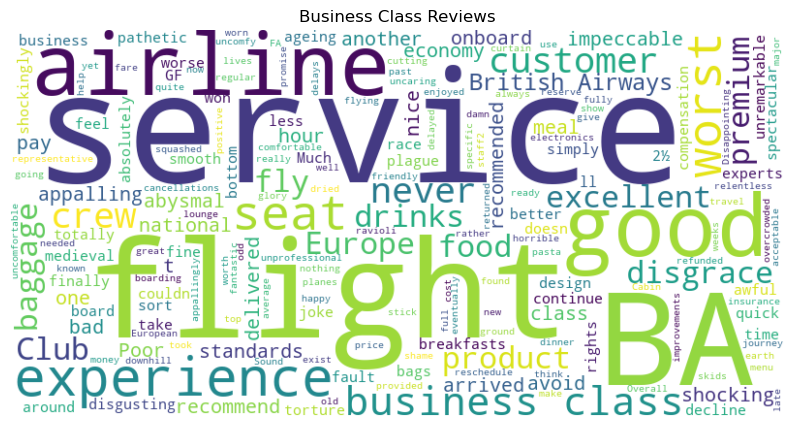

In [39]:
business_class_reviews = '\n'.join(reviews_business_class['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(business_class_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Business Class Reviews')
plt.show()

#### Premium Economy

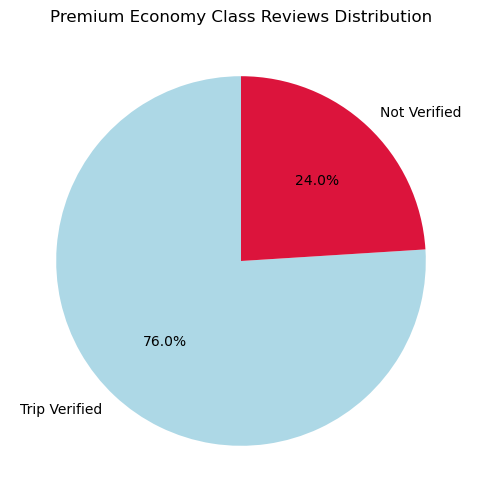

In [40]:
reviews_premium_economy_class_counts = reviews_premium_economy_class['Verification'].value_counts()
reviews_premium_economy_class_counts

plt.figure(figsize=(6, 6))
plt.pie(reviews_premium_economy_class_counts, 
        labels=reviews_premium_economy_class_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightblue', 'crimson'])
plt.title('Premium Economy Class Reviews Distribution')
plt.show()

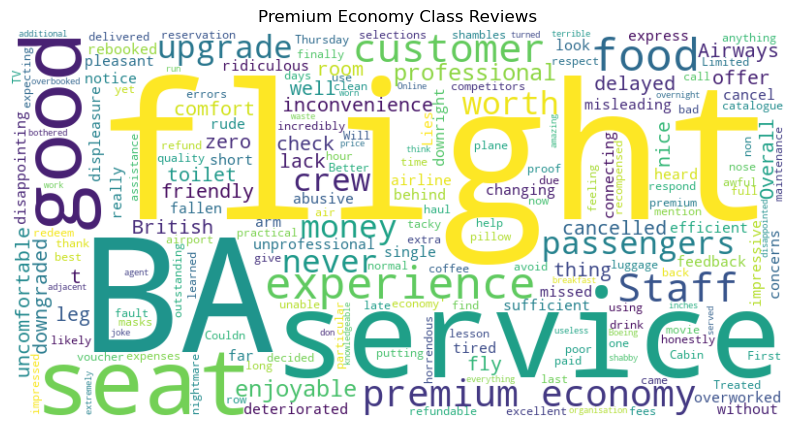

In [41]:
premium_economy_class_reviews = '\n'.join(reviews_premium_economy_class['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(premium_economy_class_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Premium Economy Class Reviews')
plt.show()

#### Economy

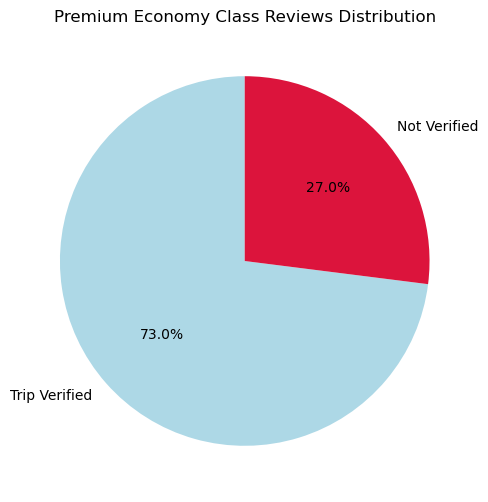

In [42]:
verification_economy_class_counts = verification_economy_class['Verification'].value_counts()
verification_economy_class_counts

plt.figure(figsize=(6, 6))
plt.pie(verification_economy_class_counts, 
        labels=verification_economy_class_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightblue', 'crimson'])
plt.title('Premium Economy Class Reviews Distribution')
plt.show()

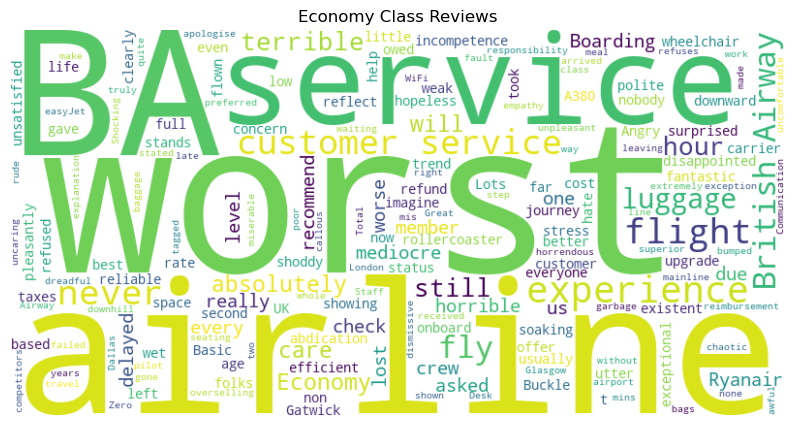

In [43]:
economy_class_reviews = '\n'.join(reviews_economy_class['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(economy_class_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Economy Class Reviews')
plt.show()

## Seat Reviews

#### Latest reviews

In [44]:
url = "https://www.airlinequality.com/seat-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100"
response = requests.get(url)
soup_latest_seat_reviews = BeautifulSoup(response.text, 'html.parser')


latest_seat_reviews_titles = soup_latest_seat_reviews.article.find_all('h2')
latest_seat_verification = soup_latest_seat_reviews.article.find_all('em')

latest_seat_reviews_titles = [h2.text.strip() for h2 in latest_seat_reviews_titles]
latest_seat_verification_texts = [em.text.strip() for em in latest_seat_verification]

# Create a DataFrame from the extracted text
# latest_seat_reviews = pd.DataFrame({"Reviews": latest_seat_reviews_titles, 
#                        "Verification": latest_seat_verification_texts})
latest_seat_reviews = pd.DataFrame({"Reviews": latest_seat_reviews_titles})
latest_seat_verification = pd.DataFrame({"Verification": latest_seat_verification_texts})

print(latest_seat_reviews)

                                          Reviews
0   "economy seat masquerading as business class"
1                                "No room at all"
2                 "seat arms are not retractable"
3                 "The most uncomfortable flight"
4                      "the flight was enjoyable"
..                                            ...
95                             "seat width is ok"
96              "closer to being a Ryanair clone"
97                     "Legroom was not the best"
98                British Airways customer review
99                           "small cramped seat"

[100 rows x 1 columns]


In [45]:
print(latest_seat_verification)

     Verification
0   Trip Verified
1   Trip Verified
2   Trip Verified
3   Trip Verified
4    Not Verified
5    Not Verified
6   Trip Verified
7   Trip Verified
8   Trip Verified
9   Trip Verified
10  Trip Verified
11   Not Verified
12  Trip Verified
13  Trip Verified
14  Trip Verified
15  Trip Verified
16  Trip Verified
17   Not Verified
18  Trip Verified
19  Trip Verified
20  Trip Verified
21  Trip Verified
22  Trip Verified
23  Trip Verified
24  Trip Verified
25  Trip Verified
26  Trip Verified
27  Trip Verified
28  Trip Verified
29  Trip Verified
30  Trip Verified
31   Not Verified
32  Trip Verified
33   Not Verified
34  Trip Verified
35  Trip Verified
36  Trip Verified
37  Trip Verified
38  Trip Verified
39  Trip Verified
40   Not Verified
41  Trip Verified
42   Not Verified
43  Trip Verified
44  Trip Verified


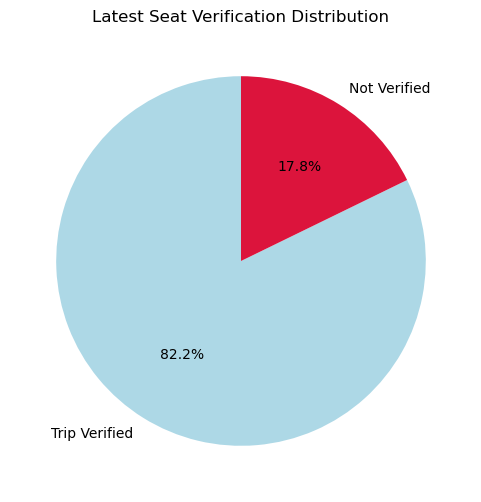

In [46]:
latest_seat_verification_counts = latest_seat_verification['Verification'].value_counts()
# latest_seat_verification_counts

plt.figure(figsize=(6, 6))
plt.pie(latest_seat_verification_counts, 
        labels=latest_seat_verification_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightblue', 'crimson'])
plt.title('Latest Seat Verification Distribution')
plt.show()

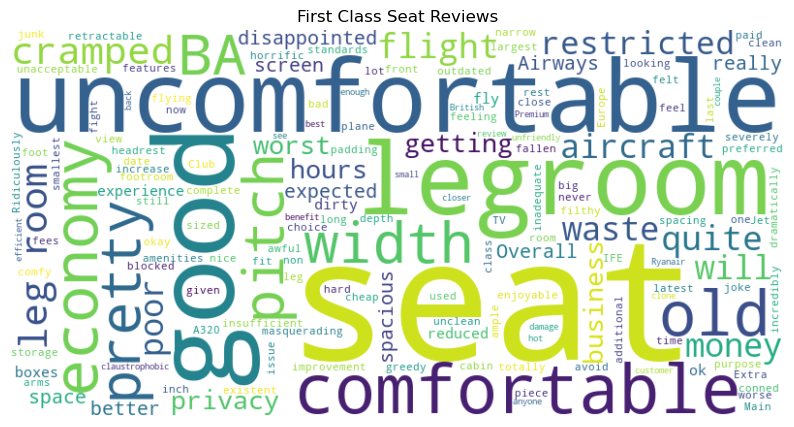

In [47]:
latest_seat_reviews = '\n'.join(latest_seat_reviews['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(latest_seat_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('First Class Seat Reviews')
plt.show()

#### Business Class

In [48]:
url = "https://www.airlinequality.com/seat-reviews/british-airways/?pagesize=100&sortby=business%3ADESC"
response = requests.get(url)
soup_business_seat_reviews = BeautifulSoup(response.text, 'html.parser')


business_seat_reviews_titles = soup_business_seat_reviews.article.find_all('h2')
business_seat_verification = soup_business_seat_reviews.article.find_all('em')

business_seat_reviews_titles = [h2.text.strip() for h2 in business_seat_reviews_titles]
business_seat_verification_texts = [em.text.strip() for em in business_seat_verification]

# Create a DataFrame from the extracted text
business_seat_reviews = pd.DataFrame({"Reviews": business_seat_reviews_titles, 
                       "Verification": business_seat_verification_texts})
# business_seat_reviews = pd.DataFrame({"Reviews": business_seat_reviews_titles})
# business_seat_verification = pd.DataFrame({"Verification": business_seat_verification_texts})

print(business_seat_reviews)

                                         Reviews   Verification
0  "economy seat masquerading as business class"  Trip Verified
1                       "privacy is pretty good"  Trip Verified
2                     "a pretty big improvement"  Trip Verified
3                      "The worst business seat"   Not Verified
4                        "Main issue is privacy"  Trip Verified
5                            "Overall good seat"  Trip Verified
6                        "Good storage features"  Trip Verified
7                "seats not to latest standards"  Trip Verified


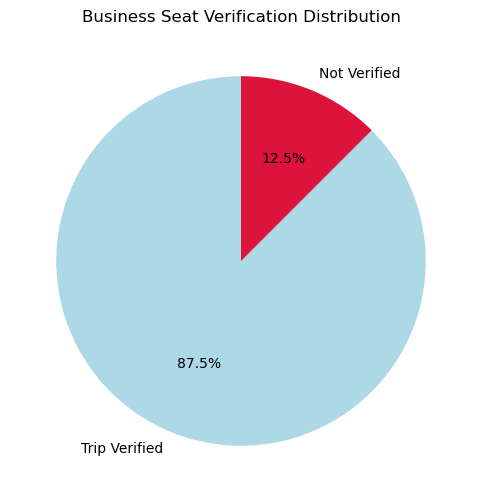

In [49]:
business_seat_verification_counts = business_seat_reviews['Verification'].value_counts()
# latest_seat_verification_counts

plt.figure(figsize=(6, 6))
plt.pie(business_seat_verification_counts, 
        labels=business_seat_verification_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightblue', 'crimson'])
plt.title('Business Seat Verification Distribution')
plt.show()

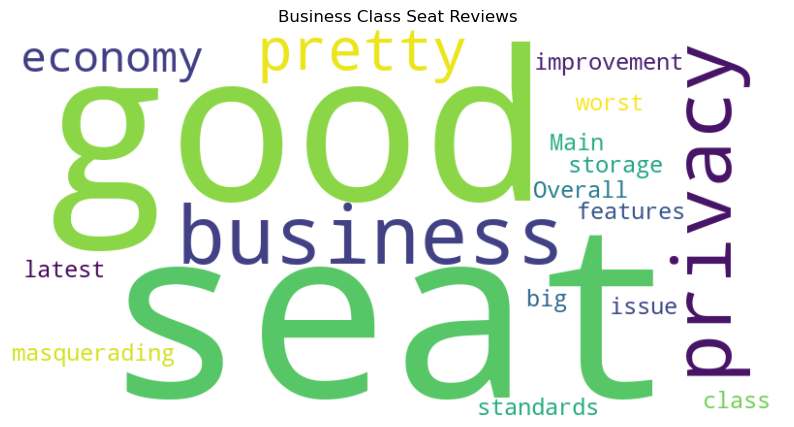

In [50]:
business_seat_reviews = '\n'.join(business_seat_reviews['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(business_seat_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Business Class Seat Reviews')
plt.show()

#### Premium Economy

In [51]:
url = "https://www.airlinequality.com/seat-reviews/british-airways/?pagesize=100&sortby=premium%3ADESC"
response = requests.get(url)
soup_premium_economy_seat_reviews = BeautifulSoup(response.text, 'html.parser')


premium_economy_seat_reviews_titles = soup_premium_economy_seat_reviews.article.find_all('h2')
premium_economy_seat_verification = soup_premium_economy_seat_reviews.article.find_all('em')

premium_economy_seat_reviews_titles = [h2.text.strip() for h2 in premium_economy_seat_reviews_titles]
premium_economy_seat_verification_texts = [em.text.strip() for em in premium_economy_seat_verification]

# Create a DataFrame from the extracted text
# premium_economy_seat_reviews = pd.DataFrame({"Reviews": premium_economy_seat_reviews_titles, 
#                        "Verification": premium_economy_seat_verification_texts})
premium_economy_seat_reviews = pd.DataFrame({"Reviews": premium_economy_seat_reviews_titles})
premium_economy_seat_verification = pd.DataFrame({"Verification": premium_economy_seat_verification_texts})

print(premium_economy_seat_reviews)

                                              Reviews
0                     "seat arms are not retractable"
1                      "felt it was a waste of money"
2                      "looking and feeling very old"
3                          "we expected a lot better"
4                 "seat itself was quite comfortable"
5                           "screens were nice sized"
6                           "Very old cabin and seat"
7                             "There was no leg rest"
8                               "aircraft was filthy"
9                            "don't waste your money"
10                            "the seat is very hard"
11                             "very poor experience"
12                          "preferred the old seats"
13                "seats were the most uncomfortable"
14                         "Dirty, outdated, unclean"
15                    "ample legroom given the pitch"
16                           "Width of seat was okay"
17                   "not as

In [52]:
print(premium_economy_seat_verification)

    Verification
0  Trip Verified
1  Trip Verified
2  Trip Verified
3   Not Verified
4  Trip Verified
5   Not Verified
6  Trip Verified
7  Trip Verified
8   Not Verified


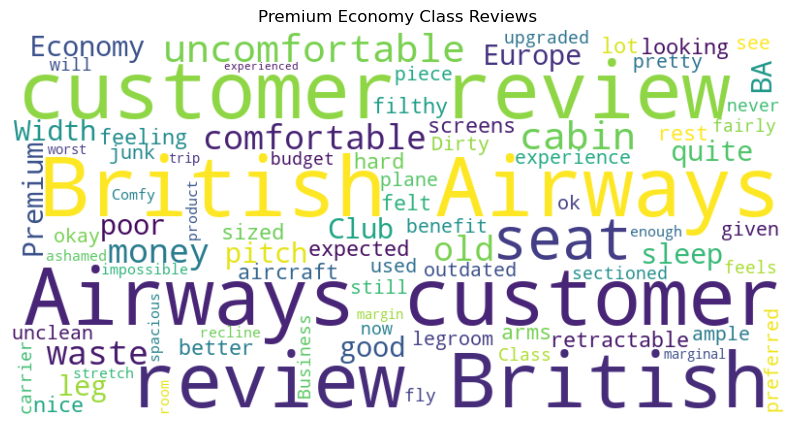

In [53]:
premium_economy_seat_reviews = '\n'.join(premium_economy_seat_reviews['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(premium_economy_seat_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Premium Economy Class Reviews')
plt.show()

#### Economy

In [54]:
url = "https://www.airlinequality.com/seat-reviews/british-airways/?pagesize=100&sortby=economy%3ADESC"
response = requests.get(url)
soup_economy_seat_reviews = BeautifulSoup(response.text, 'html.parser')


economy_seat_reviews_titles = soup_economy_seat_reviews.article.find_all('h2')
economy_seat_verification = soup_economy_seat_reviews.article.find_all('em')

economy_seat_reviews_titles = [h2.text.strip() for h2 in economy_seat_reviews_titles]
economy_seat_verification_texts = [em.text.strip() for em in economy_seat_verification]

# # Create a DataFrame from the extracted text
# economy_seat_reviews = pd.DataFrame({"Reviews": economy_seat_reviews_titles, 
#                        "Verification": economy_seat_verification_texts})
economy_seat_reviews = pd.DataFrame({"Reviews": economy_seat_reviews_titles})
economy_seat_verification = pd.DataFrame({"Verification": economy_seat_verification_texts})

print(economy_seat_reviews)

                                  Reviews
0                        "No room at all"
1         "The most uncomfortable flight"
2              "the flight was enjoyable"
3         "The seat is quite comfortable"
4   "increase the seat pitch by one inch"
..                                    ...
95        British Airways customer review
96        British Airways customer review
97        British Airways customer review
98        British Airways customer review
99        British Airways customer review

[100 rows x 1 columns]


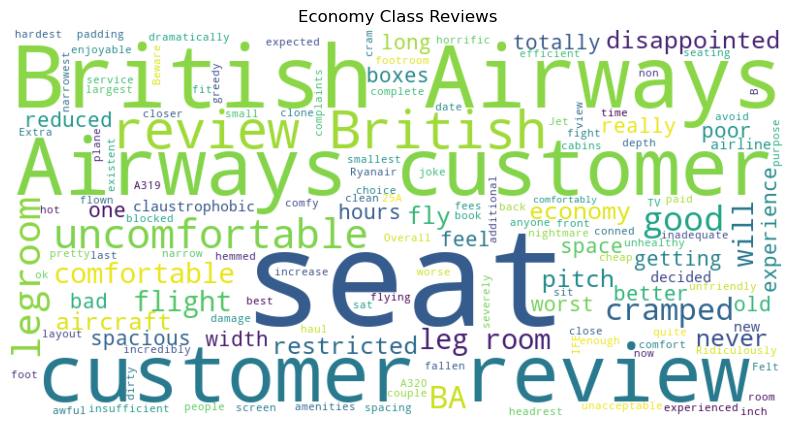

In [55]:
economy_seat_reviews = '\n'.join(economy_seat_reviews['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(economy_seat_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Economy Class Reviews')
plt.show()

### Lounge Reviews

#### Latest Lounge

In [56]:
url = "https://www.airlinequality.com/lounge-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100"
response = requests.get(url)
soup_latest_lounge_reviews = BeautifulSoup(response.text, 'html.parser')


latest_lounge_reviews_titles = soup_latest_lounge_reviews.article.find_all('h2')
latest_lounge_verification = soup_latest_lounge_reviews.article.find_all('em')

latest_lounge_reviews_titles = [h2.text.strip() for h2 in latest_lounge_reviews_titles]
latest_lounge_verification_texts = [em.text.strip() for em in latest_lounge_verification]

# Create a DataFrame from the extracted text
# latest_seat_reviews = pd.DataFrame({"Reviews": latest_seat_reviews_titles, 
#                        "Verification": latest_seat_verification_texts})
latest_lounge_reviews = pd.DataFrame({"Reviews": latest_lounge_reviews_titles})
latest_lounge_verification = pd.DataFrame({"Verification": latest_lounge_verification_texts})

print(latest_lounge_reviews)

                                     Reviews
0        "Staff were welcoming and friendly"
1   "rotten and totally incompetent airline"
2          "BA staff who are rude, abrasive"
3            "full service has been resumed"
4         "the lounge is infested with mice"
..                                       ...
95              "friendly and helpful staff"
96               "the lounge is a good size"
97                     "it lacks any pizazz"
98                       "space was limited"
99            "stop treating us like cattle"

[100 rows x 1 columns]


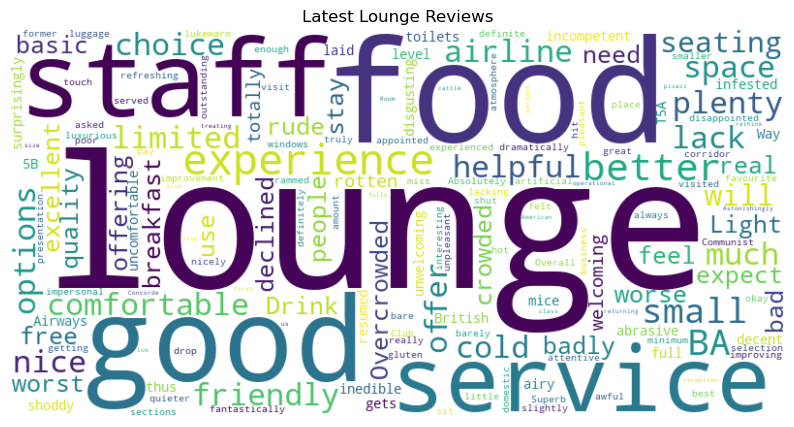

In [57]:
latest_lounge_reviews = '\n'.join(latest_lounge_reviews['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(latest_lounge_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Latest Lounge Reviews')
plt.show()

#### Best Rating

In [58]:
url = "https://www.airlinequality.com/lounge-reviews/british-airways/?pagesize=100&sortby=overall_rating%3ADESC"
response = requests.get(url)
soup_best_rating_lounge_reviews = BeautifulSoup(response.text, 'html.parser')


best_rating_lounge_reviews_titles = soup_best_rating_lounge_reviews.article.find_all('h2')
best_rating_lounge_verification = soup_best_rating_lounge_reviews.article.find_all('em')

best_rating_lounge_reviews_titles = [h2.text.strip() for h2 in best_rating_lounge_reviews_titles]
best_rating_lounge_verification_texts = [em.text.strip() for em in best_rating_lounge_verification]

# Create a DataFrame from the extracted text
# best_rating_reviews = pd.DataFrame({"Reviews": best_rating_lounge_reviews_titles, 
#                        "Verification": best_rating_lounge_verification_texts})
best_rating_lounge_reviews = pd.DataFrame({"Reviews": best_rating_lounge_reviews_titles})
best_rating_lounge_verification = pd.DataFrame({"Verification": best_rating_lounge_verification_texts})

print(best_rating_lounge_reviews)

                                              Reviews
0                            "service is outstanding"
1             "one of the nicest, smaller BA lounges"
2                        "lounge is very comfortable"
3                           "welcoming and attentive"
4                   "like the terrace in this lounge"
..                                                ...
95                   "friendly and efficient service"
96  "huge lounge lots of people but no sense of be...
97  "staff regularly walked around taking orders f...
98    "spotlessly clean relaxing and fantastic views"
99                            "I liked its quietness"

[100 rows x 1 columns]


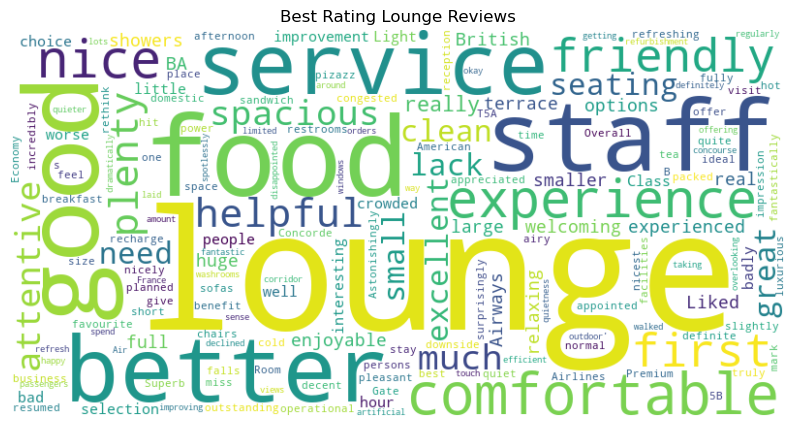

In [59]:
best_rating_lounge_reviews = '\n'.join(best_rating_lounge_reviews['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(best_rating_lounge_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Best Rating Lounge Reviews')
plt.show()

#### Lounge Comfort

In [60]:
url = "https://www.airlinequality.com/lounge-reviews/british-airways/?pagesize=100&sortby=comfort%3ADESC"
response = requests.get(url)
soup_lounge_comfort_reviews = BeautifulSoup(response.text, 'html.parser')


lounge_comfort_reviews_titles = soup_lounge_comfort_reviews.article.find_all('h2')
lounge_comfort_verification = soup_lounge_comfort_reviews.article.find_all('em')

lounge_comfort_reviews_titles = [h2.text.strip() for h2 in lounge_comfort_reviews_titles]
lounge_comfort_verification_texts = [em.text.strip() for em in lounge_comfort_verification]

# Create a DataFrame from the extracted text
# lounge_comfort_reviews = pd.DataFrame({"Reviews": lounge_comfort_reviews_titles, 
#                        "Verification": lounge_comfort_verification_texts})
lounge_comfort_reviews = pd.DataFrame({"Reviews": lounge_comfort_reviews_titles})
lounge_comfort_verification = pd.DataFrame({"Verification": lounge_comfort_verification_texts})

print(lounge_comfort_reviews)

                                              Reviews
0                      "a variety of seating options"
1                     "Superb service and good space"
2                    "Easy to find. Pleasant welcome"
3                        "friendly and helpful staff"
4   "pleasantly surprised with plenty of seating a...
..                                                ...
95        "very small lounge for the size of airport"
96  "pleasant small lounge with reasonably comfort...
97                            "Relaxed and welcoming"
98                     "happy to spend an hour there"
99                         "more crowded than normal"

[100 rows x 1 columns]


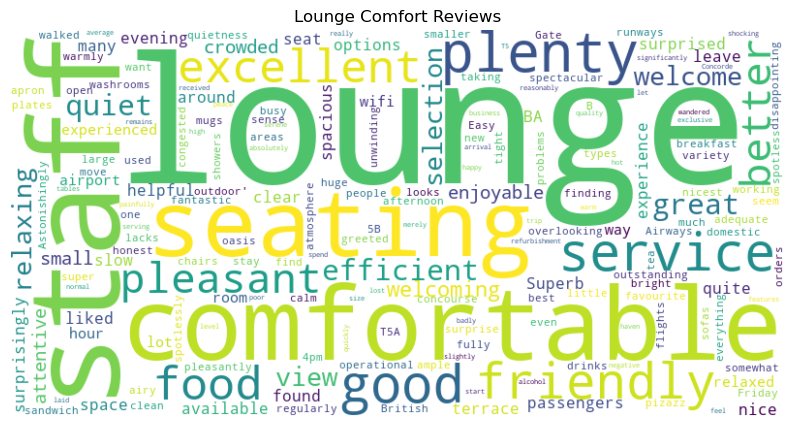

In [61]:
lounge_comfort_reviews = '\n'.join(lounge_comfort_reviews['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lounge_comfort_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Lounge Comfort Reviews')
plt.show()

#### Washroom/Showers

In [62]:
url = "https://www.airlinequality.com/lounge-reviews/british-airways/?pagesize=100&sortby=washrooms%3ADESC"
response = requests.get(url)
soup_lounge_bathroom_showers_reviews = BeautifulSoup(response.text, 'html.parser')


lounge_bathroom_showers_reviews_titles = soup_lounge_bathroom_showers_reviews.article.find_all('h2')
lounge_bathroom_showers_verification = soup_lounge_bathroom_showers_reviews.article.find_all('em')

lounge_bathroom_showers_reviews_titles = [h2.text.strip() for h2 in lounge_bathroom_showers_reviews_titles]
lounge_bathroom_showers_verification_texts = [em.text.strip() for em in lounge_bathroom_showers_verification]

# Create a DataFrame from the extracted text
# lounge_bathroom_showers_reviews = pd.DataFrame({"Reviews": lounge_bathroom_showers_reviews_titles, 
#                        "Verification": lounge_bathroom_showers_verification_texts})
lounge_bathroom_showers_reviews = pd.DataFrame({"Reviews": lounge_bathroom_showers_reviews_titles})
lounge_bathroom_showers_verification = pd.DataFrame({"Verification": lounge_bathroom_showers_verification_texts})

print(lounge_bathroom_showers_reviews)

                                            Reviews
0                   "received an excellent welcome"
1                  "Easy to find. Pleasant welcome"
2                           "staff member was rude"
3                   "For once a very pleasant stay"
4                         "the view is spectacular"
..                                              ...
95                      "the lounge is a good size"
96  "spotlessly clean relaxing and fantastic views"
97                   "pleasant and efficient staff"
98             "Staff in the lounge very attentive"
99                                "Way too crowded"

[100 rows x 1 columns]


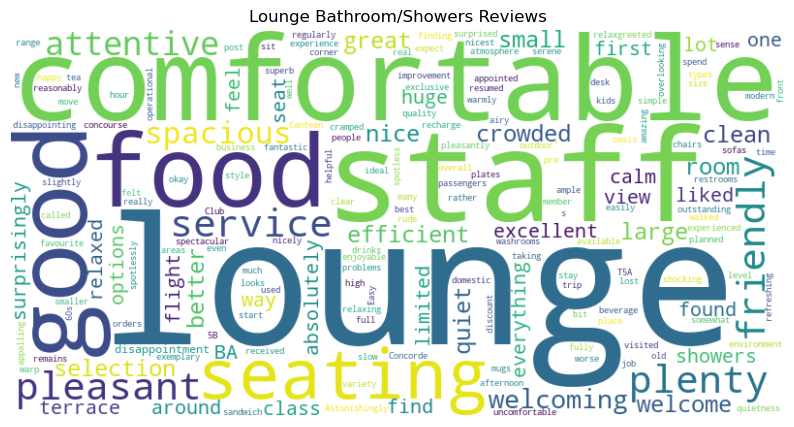

In [63]:
lounge_bathroom_showers_reviews = '\n'.join(lounge_bathroom_showers_reviews['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lounge_bathroom_showers_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Lounge Bathroom/Showers Reviews')
plt.show()

#### Recommended

In [64]:
url = "https://www.airlinequality.com/lounge-reviews/british-airways/?pagesize=100&sortby=recommended%3ADESC"
response = requests.get(url)
soup_lounge_recommendations_reviews = BeautifulSoup(response.text, 'html.parser')


lounge_recommendations_reviews_titles = soup_lounge_recommendations_reviews.article.find_all('h2')
lounge_recommendations_verification = soup_lounge_recommendations_reviews.article.find_all('em')

lounge_recommendations_reviews_titles = [h2.text.strip() for h2 in lounge_recommendations_reviews_titles]
lounge_recommendations_verification_texts = [em.text.strip() for em in lounge_recommendations_verification]

# Create a DataFrame from the extracted text
# lounge_bathroom_showers_reviews = pd.DataFrame({"Reviews": lounge_recommendations_reviews_titles, 
#                        "Verification": lounge_recommendations_verification_texts})
lounge_recommendations_reviews = pd.DataFrame({"Reviews": lounge_recommendations_reviews_titles})
lounge_recommendations_verification = pd.DataFrame({"Verification": lounge_recommendations_verification_texts})

print(lounge_recommendations_reviews)

                                         Reviews
0                         "very efficient staff"
1                         "hostess was pleasant"
2                "the new BA lounge is spacious"
3   "excellent lounge with plenty of everything"
4               "An enjoyable, relaxing 2 hours"
..                                           ...
95             "lounges look so dated and tired"
96                    "very well planned lounge"
97                     "getting worse and worse"
98                        "quality felt lacking"
99    "crowded when we first went in the lounge"

[100 rows x 1 columns]


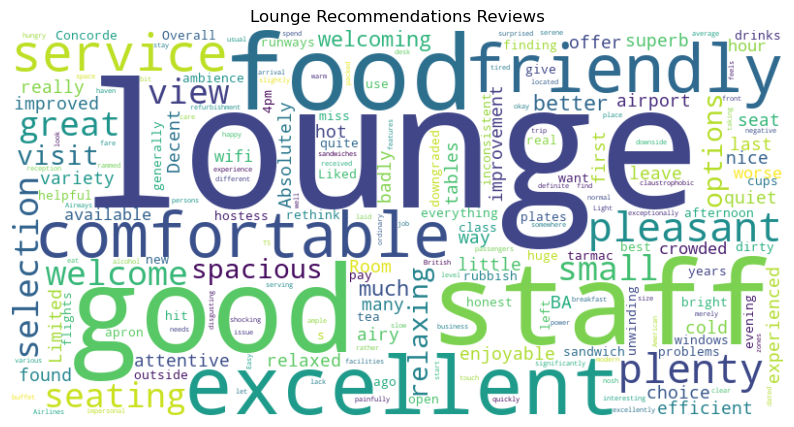

In [65]:
lounge_recommendations_reviews = '\n'.join(lounge_recommendations_reviews['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lounge_recommendations_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Lounge Recommendations Reviews')
plt.show()

#### Staff Service

In [66]:
url = "https://www.airlinequality.com/lounge-reviews/british-airways/?pagesize=100&sortby=staff_service%3ADESC"
response = requests.get(url)
soup_lounge_staff_service_reviews = BeautifulSoup(response.text, 'html.parser')


lounge_staff_service_reviews_titles = soup_lounge_staff_service_reviews.article.find_all('h2')
lounge_staff_service_verification = soup_lounge_staff_service_reviews.article.find_all('em')

lounge_staff_service_reviews_titles = [h2.text.strip() for h2 in lounge_staff_service_reviews_titles]
lounge_staff_service_verification_texts = [em.text.strip() for em in lounge_staff_service_verification]

# Create a DataFrame from the extracted text
# lounge_bathroom_showers_reviews = pd.DataFrame({"Reviews": lounge_recommendations_reviews_titles, 
#                        "Verification": lounge_recommendations_verification_texts})
lounge_staff_service_reviews = pd.DataFrame({"Reviews": lounge_staff_service_reviews_titles})
lounge_staff_service_verification = pd.DataFrame({"Verification": lounge_staff_service_verification_texts})

print(lounge_staff_service_reviews)

                                            Reviews
0   "you can easily find yourself in a nice corner"
1                 "found it to be very comfortable"
2                     "fantastically helpful staff"
3                          "pleasant helpful staff"
4                      "a little difficult to find"
..                                              ...
95                "overall extremely disappointing"
96                        "welcoming and attentive"
97                "like the terrace in this lounge"
98                 "The food was surprisingly good"
99              "good selection of food and drinks"

[100 rows x 1 columns]


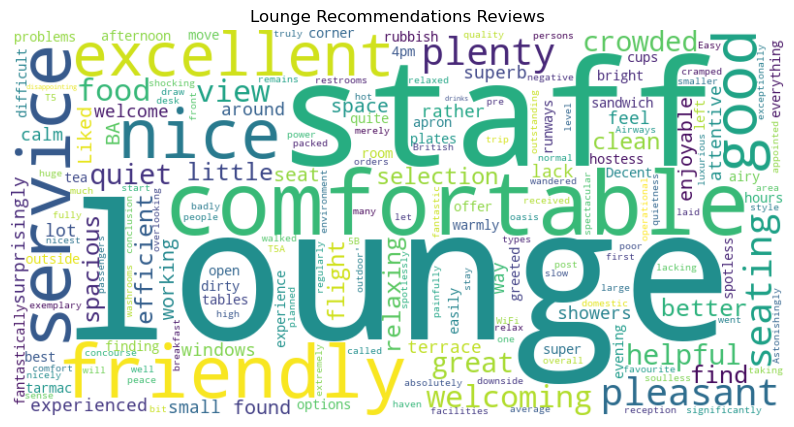

In [67]:
lounge_staff_service_reviews = '\n'.join(lounge_staff_service_reviews['Reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lounge_staff_service_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Lounge Recommendations Reviews')
plt.show()

In [106]:
def preprocess_text(text):
    return text.lower()

url_classes = {
    'first_class': "https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby=cabin%3Afirst",
    'business_class': "https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby=cabin%3Abusiness",
    'premium_economy_class': "https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby=cabin%3Ap_economy",
    'economy_class': "https://www.airlinequality.com/airline-reviews/british-airways/?pagesize=100&filterby=cabin%3Aeconomy"
}

response_classes = {}

for class_name, url in url_classes.items():
    response = requests.get(url)
    response_classes[class_name] = response

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        # Find all h2 elements within the article
        reviews_titles = soup.article.find_all('h2')

        # Extract titles and perform sentiment analysis
        titles_sentiments = [(title.text.strip(), analyze_sentiment(title.text.strip())) for title in reviews_titles]

        # Create a DataFrame with titles and sentiment scores
        df_titles_sentiments = pd.DataFrame(titles_sentiments, columns=['Title', 'Sentiment'])

        # Save the DataFrame to a CSV file (optional)
        # df_titles_sentiments.to_csv(f"{class_name}_titles_sentiment_analysis_results.csv", index=False)
    else:
        print(f"Failed to retrieve the page for {class_name}. Status code: {response.status_code}")


In [107]:
print(first_titles_sentiments)

                                     Title Sentiment
0                   "cabin crew excellent"  Positive
1               "Excellent service levels"  Positive
2                      "Very disappointed"  Negative
3                    "We are done with BA"   Neutral
4                      "Excellent service"  Positive
..                                     ...       ...
95      "not worth paying for First Class"  Negative
96        "First Class is average at best"  Positive
97    "doesn't cut the mustard any longer"  Positive
98         "BA has declined significantly"   Neutral
99  "First Class is a total wate of money"   Neutral

[100 rows x 2 columns]


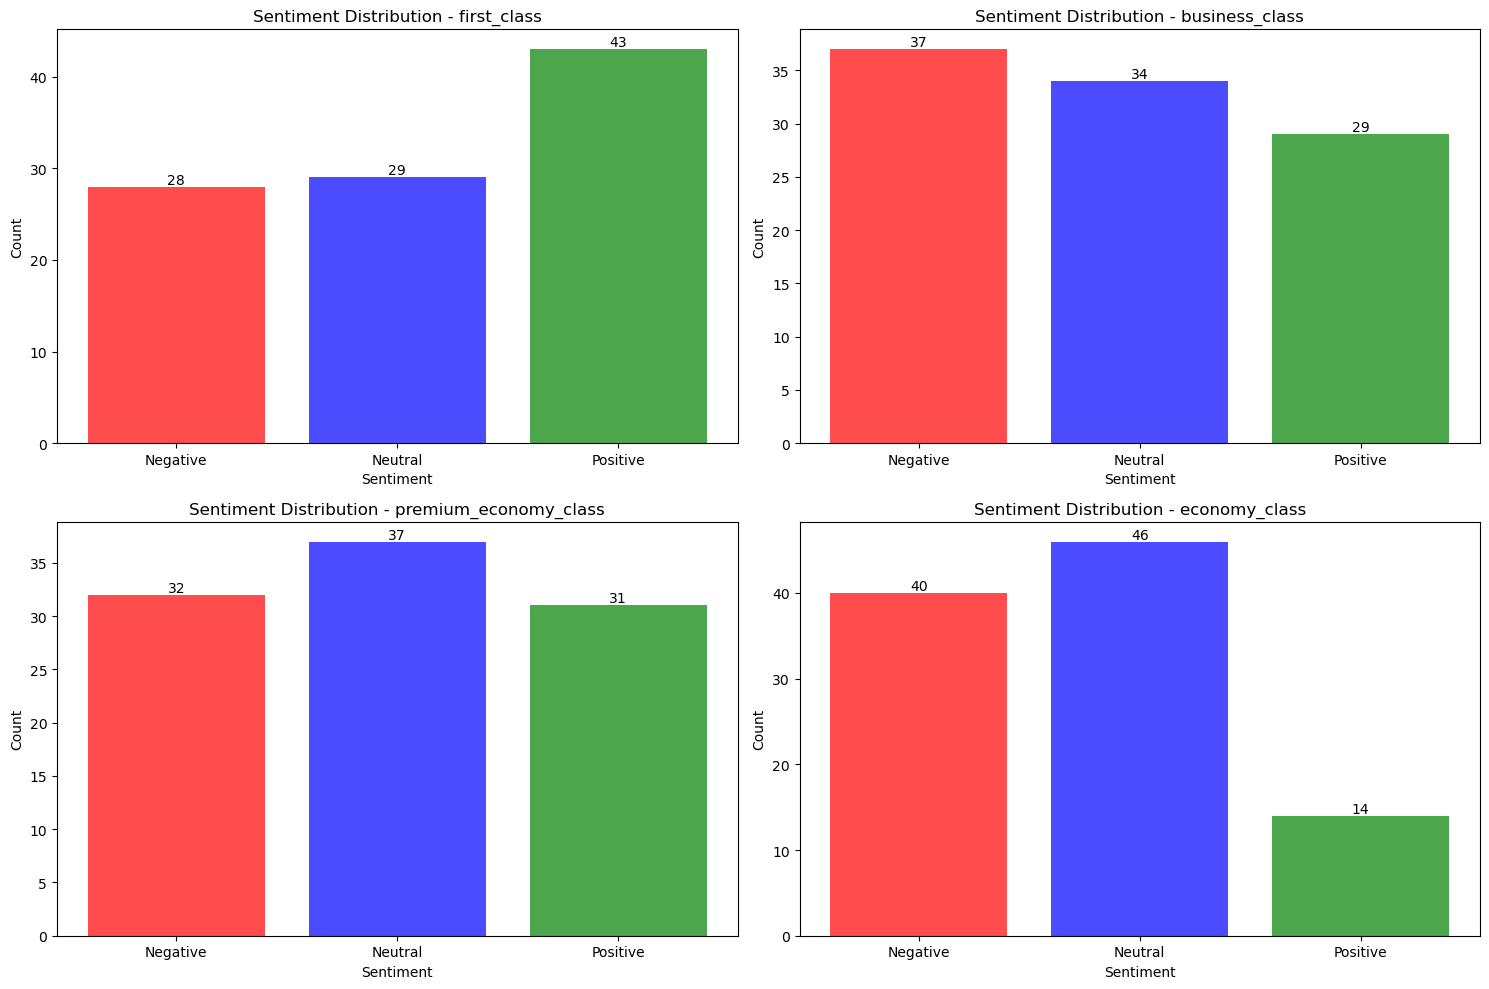

In [108]:
# Define colors for each sentiment
sentiment_colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}

# Create subplots for each class
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for ax, class_name, df_titles_sentiments in zip(axes, url_classes.keys(), [first_titles_sentiments, business_titles_sentiments, premium_economy_titles_sentiments, economy_titles_sentiments]):
    sentiment_counts = df_titles_sentiments['Sentiment'].value_counts()

    # Sort the sentiments for ordering
    sorted_sentiments = ['Negative', 'Neutral', 'Positive']
    sentiment_counts = sentiment_counts.reindex(sorted_sentiments)

    # Use specified colors for each sentiment
    bars = ax.bar(sentiment_counts.index, sentiment_counts, color=[sentiment_colors[sentiment] for sentiment in sentiment_counts.index], alpha=0.7)

    # Add data labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

    ax.set_title(f'Sentiment Distribution - {class_name}')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

#### Naive Bayes

In [109]:
# Preprocess the text
df_titles_sentiments['Processed_Title'] = df_titles_sentiments['Title'].apply(preprocess_text)

In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_titles_sentiments['Processed_Title'], df_titles_sentiments['Sentiment'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Create a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = classifier.predict(X_test_tfidf)

In [111]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

C:\Users\kariu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kariu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kariu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

    Negative       0.67      0.86      0.75         7
     Neutral       0.73      0.80      0.76        10
    Positive       0.00      0.00      0.00         3

    accuracy                           0.70        20
   macro avg       0.46      0.55      0.50        20
weighted avg       0.60      0.70      0.64        20



#### Support Vector Machine (SVM)

In [114]:
# Create a Support Vector Machine classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test_tfidf)

In [115]:
# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {accuracy_svm}")
print("SVM Classification Report:\n", classification_rep_svm)

SVM Accuracy: 0.75
SVM Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.71      0.77         7
     Neutral       0.71      1.00      0.83        10
    Positive       0.00      0.00      0.00         3

    accuracy                           0.75        20
   macro avg       0.52      0.57      0.53        20
weighted avg       0.65      0.75      0.69        20



C:\Users\kariu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kariu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kariu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### First Class Reviews Predictions

In [117]:
# Create a dictionary to store dataframes for each class
dfs_by_class = {}

for class_name, url in url_classes.items():
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, "html.parser")

        # Find all h2 elements within the article
        reviews_titles = soup.article.find_all('h2')

        # Extract titles and perform sentiment analysis
        titles_sentiments = [(title.text.strip(), analyze_sentiment(title.text.strip())) for title in reviews_titles]

        # Create a DataFrame with titles and sentiment scores
        df_titles_sentiments = pd.DataFrame(titles_sentiments, columns=['Title', 'Sentiment'])

        # Save the DataFrame to a CSV file (optional)
        # df_titles_sentiments.to_csv(f"{class_name}_titles_sentiment_analysis_results.csv", index=False)

        # Add the DataFrame to the dictionary
        dfs_by_class[class_name] = df_titles_sentiments
    else:
        print(f"Failed to retrieve the page for {class_name}. Status code: {response.status_code}")

# Example: Accessing the DataFrame for 'first_class'
print("DataFrame for 'first_class':")
print(dfs_by_class['first_class'])


DataFrame for 'first_class':
                                     Title Sentiment
0                   "cabin crew excellent"  Positive
1               "Excellent service levels"  Positive
2                      "Very disappointed"  Negative
3                    "We are done with BA"   Neutral
4                      "Excellent service"  Positive
..                                     ...       ...
95      "not worth paying for First Class"  Negative
96        "First Class is average at best"  Positive
97    "doesn't cut the mustard any longer"  Positive
98         "BA has declined significantly"   Neutral
99  "First Class is a total wate of money"   Neutral

[100 rows x 2 columns]


In [120]:
print(dfs_by_class)

{'first_class':                                      Title Sentiment
0                   "cabin crew excellent"  Positive
1               "Excellent service levels"  Positive
2                      "Very disappointed"  Negative
3                    "We are done with BA"   Neutral
4                      "Excellent service"  Positive
..                                     ...       ...
95      "not worth paying for First Class"  Negative
96        "First Class is average at best"  Positive
97    "doesn't cut the mustard any longer"  Positive
98         "BA has declined significantly"   Neutral
99  "First Class is a total wate of money"   Neutral

[100 rows x 2 columns], 'business_class':                                          Title Sentiment
0           "Very Poor Business class product"  Negative
1                 “if GF - take your own food”   Neutral
2            “pathetic business class product”   Neutral
3                      “I couldn’t fault them”  Negative
4   "one of the most

In [123]:
# Training a Naive Bayes classifier for 'first_class'
first_class_data = dfs_by_class['first_class']
X_train, X_test, y_train, y_test = train_test_split(first_class_data['Title'], first_class_data['Sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predictions for 'first_class'
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model for 'first_class'
first_class_accuracy = accuracy_score(y_test, y_pred)
first_class_classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy for 'first_class': {first_class_accuracy}")
print("Classification Report for 'first_class':\n", first_class_classification_rep)

Accuracy for 'first_class': 0.45
Classification Report for 'first_class':
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         8
     Neutral       0.20      0.25      0.22         4
    Positive       0.53      1.00      0.70         8

    accuracy                           0.45        20
   macro avg       0.24      0.42      0.31        20
weighted avg       0.25      0.45      0.32        20



C:\Users\kariu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kariu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kariu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Business Class

In [124]:
# Training a Naive Bayes classifier for 'first_class'
business_class_data = dfs_by_class['business_class']
X_train, X_test, y_train, y_test = train_test_split(business_class_data['Title'], business_class_data['Sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predictions for 'first_class'
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model for 'first_class'
business_class_accuracy = accuracy_score(y_test, y_pred)
business_class_classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy for 'business_class': {business_class_accuracy}")
print("Classification Report for 'business_class':\n", business_class_classification_rep)

Accuracy for 'business_class': 0.45
Classification Report for 'business_class':
               precision    recall  f1-score   support

    Negative       0.50      0.56      0.53         9
     Neutral       0.00      0.00      0.00         3
    Positive       0.80      0.50      0.62         8

    accuracy                           0.45        20
   macro avg       0.43      0.35      0.38        20
weighted avg       0.55      0.45      0.48        20



#### Premium Economy

In [126]:
# Training a Naive Bayes classifier for 'first_class'
premium_economy_class_data = dfs_by_class['premium_economy_class']
X_train, X_test, y_train, y_test = train_test_split(premium_economy_class_data['Title'], premium_economy_class_data['Sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predictions for 'first_class'
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model for 'premium_economy_class'
premium_economy_accuracy = accuracy_score(y_test, y_pred)
premium_economy_classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy for 'premium_economy_class': {premium_economy_accuracy}")
print("Classification Report for 'premium_economy_class':\n", premium_economy_classification_rep)

Accuracy for 'premium_economy_class': 0.4
Classification Report for 'premium_economy_class':
               precision    recall  f1-score   support

    Negative       0.67      0.25      0.36         8
     Neutral       0.23      1.00      0.38         3
    Positive       0.75      0.33      0.46         9

    accuracy                           0.40        20
   macro avg       0.55      0.53      0.40        20
weighted avg       0.64      0.40      0.41        20



#### Economy

In [132]:
# Training a Naive Bayes classifier for 'first_class'
economy_class_data = dfs_by_class['economy_class']
X_train, X_test, y_train, y_test = train_test_split(economy_class_data['Title'], economy_class_data['Sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Predictions for 'economy_class'
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model for 'economy_class'
economy_accuracy = accuracy_score(y_test, y_pred)
economy_classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy for 'economy_class': {economy_accuracy}")
print("Classification Report for 'economy_class':\n", economy_classification_rep)

Accuracy for 'economy_class': 0.7
Classification Report for 'economy_class':
               precision    recall  f1-score   support

    Negative       0.67      0.86      0.75         7
     Neutral       0.73      0.80      0.76        10
    Positive       0.00      0.00      0.00         3

    accuracy                           0.70        20
   macro avg       0.46      0.55      0.50        20
weighted avg       0.60      0.70      0.64        20



C:\Users\kariu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kariu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kariu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


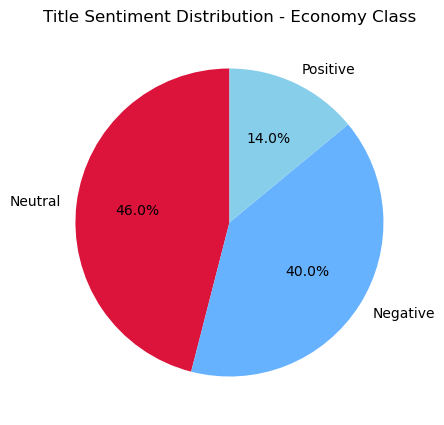

In [137]:
economy_class_data = dfs_by_class['economy_class']

# Count the occurrences of each sentiment
sentiment_counts = economy_class_data['Sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['crimson', '#66B2FF', 'skyblue'])
plt.title('Title Sentiment Distribution - Economy Class')
plt.show()